## Use of DecisionTreeClassifier and RandomForestClassifier

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

[Kaggle](https://www.kaggle.com/c/titanic/overview)

### Data Dictionary

<table style="float: left">
    <tr>
        <th>Variable</th>
        <th>Definition</th>
        <th>Key</th>
    </tr>
    <tr>
        <td>survival</td>
        <td>Survival</td>
        <td>0 = No, 1 = Yes</td>
    </tr>
    <tr>
        <td>pclass</td>
        <td>Ticket class</td>
        <td>1 = 1st, 2 = 2nd, 3 = 3rd</td>
    </tr>
    <tr>
        <td>sex</td>
        <td>Sex</td>
        <td>Sex</td>
    </tr>
    <tr>
        <td>Age</td>
        <td>Age in years</td>
        <td></td>
    </tr>
    <tr>
        <td>sibsp</td>
        <td># of siblings / spouses aboard the Titanic</td>
        <td></td>
    </tr>
    <tr>
        <td>parch</td>
        <td># of parents / children aboard the Titanic</td>
        <td></td>
    </tr>
    <tr>
        <td>ticket</td>
        <td>Ticket number</td>
        <td></td>
    </tr>
    <tr>
        <td>fare</td>
        <td>Passenger fare</td>
        <td></td>
    </tr>
    <tr>
        <td>cabin</td>
        <td>Cabin number</td>
        <td></td>
    </tr>
    <tr>
        <td>embarked</td>
        <td>Port of Embarkation</td>
        <td>C = Cherbourg, Q = Queenstown, S = Southampton</td>
    </tr>
</table>

# Fetch Data

### Read data

In [1]:
import pandas as pd

df = pd.read_csv("data/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Describe data

In [2]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Prepare and clean Data

### Droping some coulms that seems not important

index = 0 : Removing particular row, index = 1: Removing a column

In [3]:
df = df.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### Removed rows having null value column

In [4]:
df = df.dropna()
print("Cleaning after removing unnecessary columns:", df.shape)

Cleaning after removing unnecessary columns: (712, 8)


### Renaming cols

In [5]:
df.columns = ['Survived', 'Class', 'Sex', 'Age', 'Sib', 'Par', 'Fare', 'Embarked']
df.head()

,Survived,Class,Sex,Age,Sib,Par,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### Encode string values with int

In [6]:
df['Sex'].replace(['female','male'], [1,2], inplace=True)
df['Embarked'].replace(['S','C','Q'], [1,2,3], inplace=True)
df.head()

,Survived,Class,Sex,Age,Sib,Par,Fare,Embarked
0,0,3,2,22.0,1,0,7.2500,1
1,1,1,1,38.0,1,0,71.2833,2
2,1,3,1,26.0,0,0,7.9250,1
3,1,1,1,35.0,1,0,53.1000,1
4,0,3,2,35.0,0,0,8.0500,1


# Visualize Data

Documentation link https://matplotlib.org/gallery/index.html

What to visualize?
- Can we show the survival of male and females?
- Can we show the survival of age groups?
- Can we show the survival of fare groups?


In [7]:
totalMale = df[(df.Sex.eq(2))]
totalFemale = df[(df.Sex.eq(1))]
survivedMale = df[(df.Sex.eq(2) & df.Survived.eq(1))]
survivedFemale = df[(df.Sex.eq(1) & df.Survived.eq(1))]
youngAgeSurvivedMale = df[(df.Age.between(0,30) & df.Sex.eq(2) & df.Survived.eq(1))]
print(f'total male: {len(totalMale)}, total female: {len(totalFemale)}')
print(f'survivedMale: {len(survivedMale)}, survivedFemale: {len(survivedFemale)}, youngAgeSurvivedMale: {len(youngAgeSurvivedMale)}')

total male: 453, total female: 259
survivedMale: 93, survivedFemale: 195, youngAgeSurvivedMale: 52


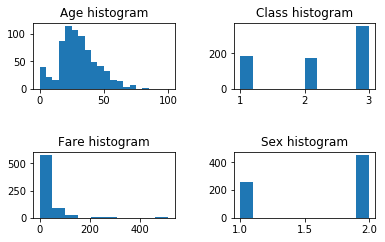

In [45]:
import matplotlib.pyplot as plt
import numpy as np

plt.subplot(2,2,1)
bins = np.arange(0,101,5)
plt.hist(df[df['Age'].isnull() == False].Age, bins=bins)
plt.title('Age histogram')

plt.subplot(2,2,2)
plt.hist(df[df['Class'].isnull() == False].Class)
plt.title('Class histogram')

plt.subplot(2,2,3)
plt.hist(df[df['Fare'].isnull() == False].Fare)
plt.title('Fare histogram')

plt.subplot(2,2,4)
plt.hist(df[df['Sex'].isnull() == False].Sex)
plt.title('Sex histogram')
plt.tight_layout(pad=3.0)
plt.show()

### Age vs Survival 
0 - Not suvived

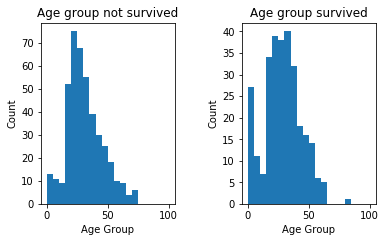

In [9]:
plt.subplot(1,2,1)
notSurvived = df[(df.Age.isnull() == False) & (df.Survived == 0)]
plt.hist(notSurvived.Age, bins=np.arange(0,101,5))
plt.title('Age group not survived')
plt.ylabel('Count')
plt.xlabel('Age Group')
plt.subplot(1,2,2)
survived = df[(df.Age.isnull() == False) & (df.Survived == 1)]
plt.hist(survived.Age, bins=np.arange(0,101,5))
plt.title('Age group survived')
plt.ylabel('Count')
plt.xlabel('Age Group')
plt.tight_layout(pad=3.0)
plt.show()

### Class vs Survival

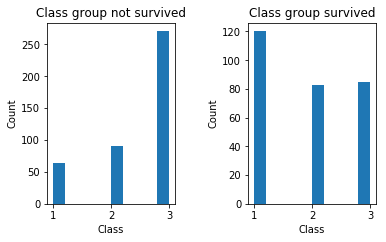

In [10]:
plt.subplot(1,2,1)
notSurvived = df[(df.Class.isnull() == False) & (df.Survived == 0)]
plt.hist(notSurvived.Class)
plt.title('Class group not survived')
plt.ylabel('Count')
plt.xlabel('Class')
plt.subplot(1,2,2)
survived = df[(df.Class.isnull() == False) & (df.Survived == 1)]
plt.hist(survived.Class)
plt.title('Class group survived')
plt.ylabel('Count')
plt.xlabel('Class')
plt.tight_layout(pad=3.0)
plt.show()

### Number of siblings / spouses aboard the Titanic vs Survival

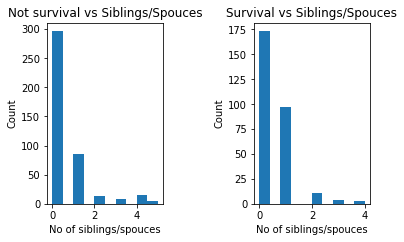

In [11]:
plt.subplot(1,2,1)
notSurvived = df[(df.Sib.isnull() == False) & (df.Survived == 0)]
plt.hist(notSurvived.Sib)
plt.title('Not survival vs Siblings/Spouces')
plt.ylabel('Count')
plt.xlabel('No of siblings/spouces')
plt.subplot(1,2,2)
survived = df[(df.Sib.isnull() == False) & (df.Survived == 1)]
plt.hist(survived.Sib)
plt.title('Survival vs Siblings/Spouces')
plt.ylabel('Count')
plt.xlabel('No of siblings/spouces')
plt.tight_layout(pad=3.0)
plt.show()

### Number of parents / children aboard the Titanic vs Survival

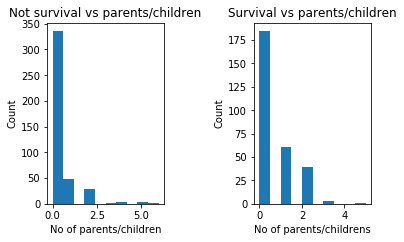

In [12]:
plt.subplot(1,2,1)
notSurvived = df[(df.Par.isnull() == False) & (df.Survived == 0)]
plt.hist(notSurvived.Par)
plt.title('Not survival vs parents/children')
plt.ylabel('Count')
plt.xlabel('No of parents/children')
plt.subplot(1,2,2)
survived = df[(df.Par.isnull() == False) & (df.Survived == 1)]
plt.hist(survived.Par)
plt.title('Survival vs parents/children')
plt.ylabel('Count')
plt.xlabel('No of parents/childrens')
plt.tight_layout(pad=3.0)
plt.show()

# Train data

In [13]:
from sklearn.tree import DecisionTreeClassifier

train_data = df[df.columns[1:8]].values
print(train_data.shape)
train_label = df[df.columns[0]].values
tree_classifier = DecisionTreeClassifier(max_leaf_nodes=8, min_samples_leaf=1, max_depth=None, criterion="gini")
tree_classifier = tree_classifier.fit(train_data, train_label)

(712, 7)


### Tree visualization

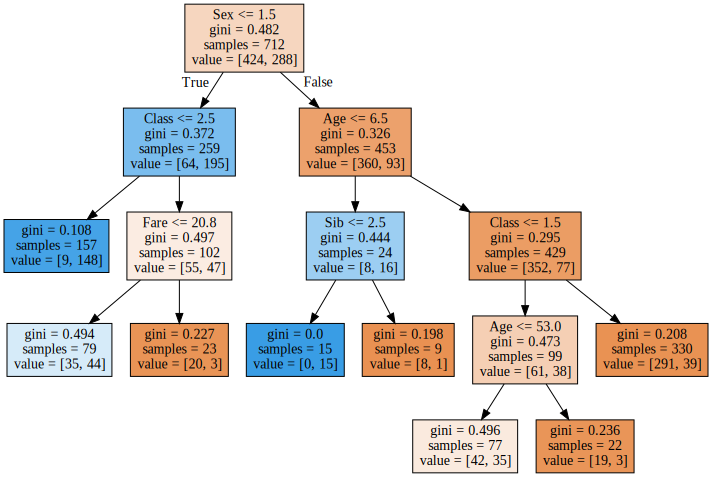

In [16]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(tree_classifier, filled=True, feature_names=['Class', 'Sex', 'Age', 'Sib', 'Par', 'Fare', 'Embarked'], out_file=None) 
graph = graphviz.Source(dot_data) 
graph

### Read the test data

In [17]:
test_data = pd.read_csv("data/test.csv")
test_survived = pd.read_csv("data/gender_submission.csv")
test_data = pd.concat([test_survived, test_data], sort=False, axis=1)
test_data.head()

,PassengerId,Survived,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Test data cleanup

In [18]:
print('Before Cleanup',test_data.shape)
test_data = test_data.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1)
test_data = test_data.dropna()
test_data.columns = ['Survived', 'Class', 'Sex', 'Age', 'Sib', 'Par', 'Fare', 'Embarked']
test_data['Sex'].replace(['female','male'], [1,2], inplace=True)
test_data['Embarked'].replace(['S','C','Q'], [1,2,3], inplace=True)
print('After Cleanup',test_data.shape)

Before Cleanup (418, 13)
After Cleanup (331, 8)


In [19]:
test_data.head()

,Survived,Class,Sex,Age,Sib,Par,Fare,Embarked
0,0,3,2,34.5,0,0,7.8292,3
1,1,3,1,47.0,1,0,7.0000,1
2,0,2,2,62.0,0,0,9.6875,3
3,0,3,2,27.0,0,0,8.6625,1
4,1,3,1,22.0,1,1,12.2875,1


### Separate the test data and test label

In [20]:
test_x = test_data[test_data.columns[1:8]]
test_y = test_data[test_data.columns[0]].values
predect = tree_classifier.predict(test_x.values)
predect.shape

(331,)

### Calculate accuracy

In [21]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(predect,test_y))
print(confusion_matrix(predect,test_y))
print(accuracy_score(predect,test_y)*100)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       201
           1       0.98      0.95      0.96       130

   micro avg       0.97      0.97      0.97       331
   macro avg       0.97      0.97      0.97       331
weighted avg       0.97      0.97      0.97       331

[[198   3]
 [  6 124]]
97.2809667673716


In [43]:
from sklearn.ensemble import RandomForestClassifier

forest_classifier = RandomForestClassifier(
    n_estimators=100, random_state=10, max_depth=3, 
    max_features='auto',
    criterion='gini', bootstrap=True, 
    min_samples_split=2, oob_score=True)
forest_classifier.fit(train_data, train_label)
predect = forest_classifier.predict(test_x.values)

In [44]:
print(classification_report(predect,test_y))
print(confusion_matrix(predect,test_y))
print(accuracy_score(predect,test_y)*100)

              precision    recall  f1-score   support

           0       0.98      0.82      0.89       243
           1       0.66      0.95      0.78        88

   micro avg       0.86      0.86      0.86       331
   macro avg       0.82      0.89      0.84       331
weighted avg       0.90      0.86      0.86       331

[[200  43]
 [  4  84]]
85.80060422960725


In [137]:
from sklearn.ensemble import AdaBoostClassifier
adab_classifier = AdaBoostClassifier(
    n_estimators=5, random_state=0,
base_estimator = RandomForestClassifier(
    n_estimators=60, random_state=0, max_depth=3, 
    criterion='entropy', bootstrap=True, 
    min_samples_split=3, oob_score=True))
adab_classifier.fit(train_data, train_label)
predect = adab_classifier.predict(test_x.values)

In [138]:
print(classification_report(predect,test_y))
print(confusion_matrix(predect,test_y))
print(accuracy_score(predect,test_y)*100)

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       201
           1       0.90      0.88      0.89       130

   micro avg       0.91      0.91      0.91       331
   macro avg       0.91      0.91      0.91       331
weighted avg       0.91      0.91      0.91       331

[[188  13]
 [ 16 114]]
91.23867069486404
